In [1]:
import os
import re
import unicodedata
import warnings
warnings.filterwarnings('ignore')
import json
from typing import Dict, List, Optional, Union, cast
import requests
import acquire
import prepare
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pprint import pprint

In [2]:
df = prepare.create_final_csv()

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:
df.head()

,repo,language,readme_contents,cleaned,without_stop_words,tokenized,stem,lemm
0,pyca/cryptography,Python,pyca/cryptography\n=================\n\n.. ima...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptographi imag http img shield io pypi...,pyca cryptography image http img shield io pyp...
1,sobolevn/awesome-cryptography,NaN,# Awesome Cryptography [![Awesome](https://cdn...,awesome cryptography awesome https cdn rawgit ...,awesome cryptography awesome https cdn rawgit ...,awesome cryptography awesome https cdn rawgit ...,awesom cryptographi awesom http cdn rawgit com...,awesome cryptography awesome http cdn rawgit c...
2,randombit/botan,C++,Botan: Crypto and TLS for Modern C++\n========...,botan crypto tls modern c botan japanese peony...,botan crypto tls modern c botan japanese peony...,botan crypto tls modern c botan japanese peony...,botan crypto tl modern c botan japanes peoni f...,botan crypto tl modern c botan japanese peony ...
3,golang/crypto,Go,# Go Cryptography\n\n[![Go Reference](https://...,go cryptography go reference https pkg go dev ...,go cryptography go reference https pkg go dev ...,go cryptography go reference https pkg go dev ...,go cryptographi go refer http pkg go dev badg ...,go cryptography go reference http pkg go dev b...
4,pycrypto/pycrypto,Python,| ⚠️ WARNING ...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warn pycrypto 2 x unmaintain obsolet contain s...,warning pycrypto 2 x unmaintained obsolete con...


In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

repo                  0
language              0
readme_contents       0
cleaned               0
without_stop_words    0
tokenized             0
stem                  0
lemm                  0
dtype: int64

# Exploratory Analysis
- What are the top 5 languages
- What are the top 20 words across all the languages
- What are the top 10 words for each language
- Which language has the longest Readme on average


In [7]:
df.language.value_counts().head()

Python        73
C             61
JavaScript    51
Rust          48
C++           36
Name: language, dtype: int64

In [8]:
languages = df.language.unique().tolist()

In [9]:
languages

['Python',
 'C++',
 'Go',
 'C',
 'Haskell',
 'JavaScript',
 'TeX',
 'Rust',
 'TypeScript',
 'Java',
 'Swift',
 'PHP',
 'C#',
 'HTML',
 'Jupyter Notebook',
 'Assembly']

In [10]:
lang_dict = {}
languages = df.language.unique()
for lang in languages: 
    lang_dict[lang] = df[df.language == lang]
        
for key, val in lang_dict.items():
    print(f'key:{key}, val:{val}')

key:Python, val:                                   repo language  \
0                     pyca/cryptography   Python   
4                     pycrypto/pycrypto   Python   
11       TomLous/coursera-cryptography1   Python   
16                       crypto101/book   Python   
20   georgemarshall/django-cryptography   Python   
..                                  ...      ...   
419                ipt-labs/crypto-FB-9   Python   
424                   JHUISI/auto-tools   Python   
426                 Carleslc/CryptTools   Python   
428           tf-encrypted/tf-encrypted   Python   
429                 jbdrvl/cryptography   Python   

                                       readme_contents  \
0    pyca/cryptography\n=================\n\n.. ima...   
4    | ⚠️ WARNING                                  ...   
11   coursera-cryptography1\n======================...   
16   ======================\n Crypto 101: the book\...   
20   Django Cryptography\n===================\n\nA ...   
..         

In [11]:
list(lang_dict)

['Python',
 'C++',
 'Go',
 'C',
 'Haskell',
 'JavaScript',
 'TeX',
 'Rust',
 'TypeScript',
 'Java',
 'Swift',
 'PHP',
 'C#',
 'HTML',
 'Jupyter Notebook',
 'Assembly']

In [12]:
lang_dict['Python']

,repo,language,readme_contents,cleaned,without_stop_words,tokenized,stem,lemm
0,pyca/cryptography,Python,pyca/cryptography\n=================\n\n.. ima...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptographi imag http img shield io pypi...,pyca cryptography image http img shield io pyp...
4,pycrypto/pycrypto,Python,| ⚠️ WARNING ...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warn pycrypto 2 x unmaintain obsolet contain s...,warning pycrypto 2 x unmaintained obsolete con...
11,TomLous/coursera-cryptography1,Python,coursera-cryptography1\n======================...,coursera cryptography1 assignments coursera's ...,coursera cryptography1 assignments coursera's ...,coursera cryptography1 assignments coursera ' ...,coursera cryptography1 assign coursera' crypto...,coursera cryptography1 assignment coursera's c...
16,crypto101/book,Python,======================\n Crypto 101: the book\...,crypto 101 book image https com crypto101 book...,crypto 101 book image https com crypto101 book...,crypto 101 book image https com crypto101 book...,crypto 101 book imag http com crypto101 book a...,crypto 101 book image http com crypto101 book ...
20,georgemarshall/django-cryptography,Python,Django Cryptography\n===================\n\nA ...,django cryptography set primitives easily encr...,django cryptography set primitives easily encr...,django cryptography set primitives easily encr...,django cryptographi set primit easili encrypt ...,django cryptography set primitive easily encry...
...,...,...,...,...,...,...,...,...
419,ipt-labs/crypto-FB-9,Python,# crypto-FB-9\ncryptography labs for students ...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptographi lab student fb 9 2021...,crypto fb 9 cryptography lab student fb 9 2021...
424,JHUISI/auto-tools,Python,AutoTools: automated tools\n==================...,autotools automated tools build status https t...,autotools automated tools build status https t...,autotools automated tools build status https t...,autotool autom tool build statu http travi ci ...,autotools automated tool build status http tra...
426,Carleslc/CryptTools,Python,"# CryptTools\n\nTools for encryption, decrypti...",crypttools tools encryption decryption crackin...,crypttools tools encryption decryption crackin...,crypttools tools encryption decryption crackin...,crypttool tool encrypt decrypt crack sever cry...,crypttools tool encryption decryption cracking...
428,tf-encrypted/tf-encrypted,Python,"<img src=""https://tinyurl.com/tfelogo"" width=""...",img src https tinyurl com tfelogo width 65 tf ...,img src https tinyurl com tfelogo width 65 tf ...,img src https tinyurl com tfelogo width 65 tf ...,img src http tinyurl com tfelogo width 65 tf e...,img src http tinyurl com tfelogo width 65 tf e...


# make histogram showing the count of languages

<AxesSubplot:xlabel='language', ylabel='Count'>

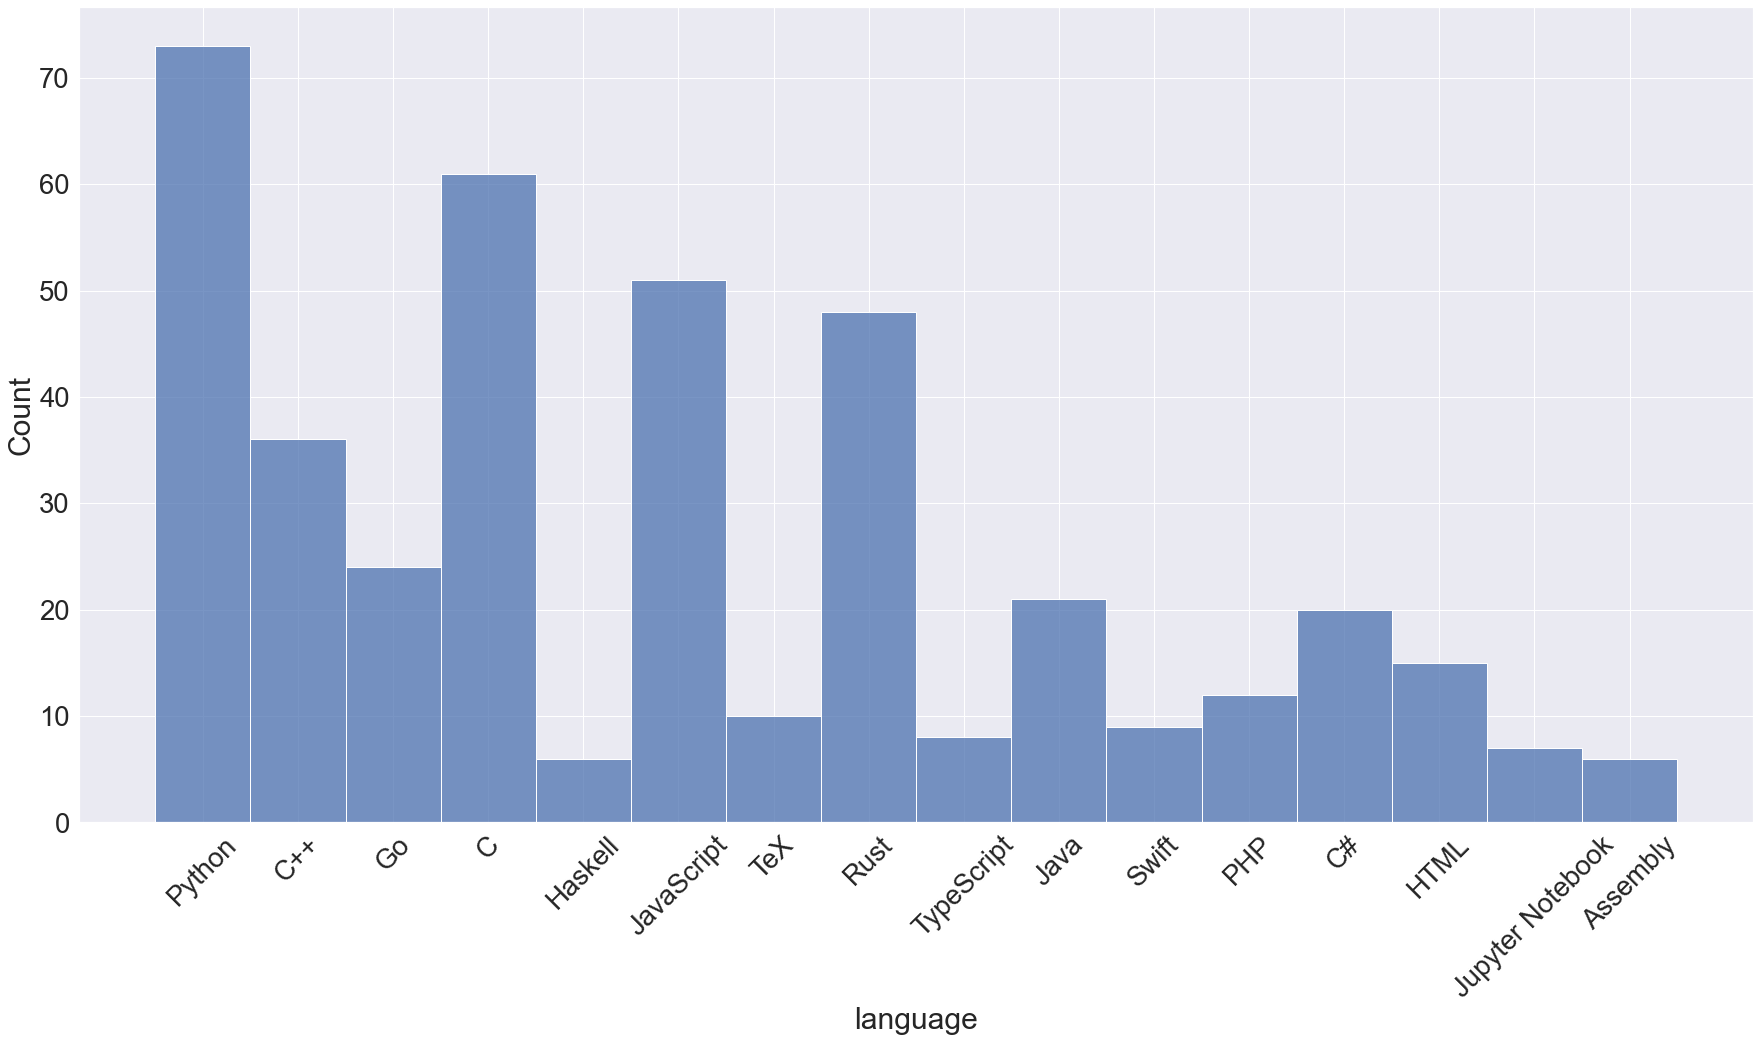

In [13]:
# Histogram of words used by language
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
plt.xticks(rotation=45)
sns.histplot(data = df, x = df.language)

In [14]:
df.language.value_counts()

Python              73
C                   61
JavaScript          51
Rust                48
C++                 36
Go                  24
Java                21
C#                  20
HTML                15
PHP                 12
TeX                 10
Swift                9
TypeScript           8
Jupyter Notebook     7
Haskell              6
Assembly             6
Name: language, dtype: int64

### Takeaway: python is the most used language for these repositories, followed by C, javascript, and rust. 

## look at the most used words by language

In [15]:
lang_dict['Python']

,repo,language,readme_contents,cleaned,without_stop_words,tokenized,stem,lemm
0,pyca/cryptography,Python,pyca/cryptography\n=================\n\n.. ima...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptography image https img shields io p...,pyca cryptographi imag http img shield io pypi...,pyca cryptography image http img shield io pyp...
4,pycrypto/pycrypto,Python,| ⚠️ WARNING ...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warning pycrypto 2 x unmaintained obsolete con...,warn pycrypto 2 x unmaintain obsolet contain s...,warning pycrypto 2 x unmaintained obsolete con...
11,TomLous/coursera-cryptography1,Python,coursera-cryptography1\n======================...,coursera cryptography1 assignments coursera's ...,coursera cryptography1 assignments coursera's ...,coursera cryptography1 assignments coursera ' ...,coursera cryptography1 assign coursera' crypto...,coursera cryptography1 assignment coursera's c...
16,crypto101/book,Python,======================\n Crypto 101: the book\...,crypto 101 book image https com crypto101 book...,crypto 101 book image https com crypto101 book...,crypto 101 book image https com crypto101 book...,crypto 101 book imag http com crypto101 book a...,crypto 101 book image http com crypto101 book ...
20,georgemarshall/django-cryptography,Python,Django Cryptography\n===================\n\nA ...,django cryptography set primitives easily encr...,django cryptography set primitives easily encr...,django cryptography set primitives easily encr...,django cryptographi set primit easili encrypt ...,django cryptography set primitive easily encry...
...,...,...,...,...,...,...,...,...
419,ipt-labs/crypto-FB-9,Python,# crypto-FB-9\ncryptography labs for students ...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptography labs students fb 9 20...,crypto fb 9 cryptographi lab student fb 9 2021...,crypto fb 9 cryptography lab student fb 9 2021...
424,JHUISI/auto-tools,Python,AutoTools: automated tools\n==================...,autotools automated tools build status https t...,autotools automated tools build status https t...,autotools automated tools build status https t...,autotool autom tool build statu http travi ci ...,autotools automated tool build status http tra...
426,Carleslc/CryptTools,Python,"# CryptTools\n\nTools for encryption, decrypti...",crypttools tools encryption decryption crackin...,crypttools tools encryption decryption crackin...,crypttools tools encryption decryption crackin...,crypttool tool encrypt decrypt crack sever cry...,crypttools tool encryption decryption cracking...
428,tf-encrypted/tf-encrypted,Python,"<img src=""https://tinyurl.com/tfelogo"" width=""...",img src https tinyurl com tfelogo width 65 tf ...,img src https tinyurl com tfelogo width 65 tf ...,img src https tinyurl com tfelogo width 65 tf ...,img src http tinyurl com tfelogo width 65 tf e...,img src http tinyurl com tfelogo width 65 tf e...


In [16]:
data = lang_dict['Python'].readme_contents.values

In [17]:
data = df.readme_contents.values

In [18]:
data

array(['pyca/cryptography\n=================\n\n.. image:: https://img.shields.io/pypi/v/cryptography.svg\n    :target: https://pypi.org/project/cryptography/\n    :alt: Latest Version\n\n.. image:: https://readthedocs.org/projects/cryptography/badge/?version=latest\n    :target: https://cryptography.io\n    :alt: Latest Docs\n\n.. image:: https://github.com/pyca/cryptography/workflows/CI/badge.svg?branch=main\n    :target: https://github.com/pyca/cryptography/actions?query=workflow%3ACI+branch%3Amain\n\n\n``cryptography`` is a package which provides cryptographic recipes and\nprimitives to Python developers.  Our goal is for it to be your "cryptographic\nstandard library". It supports Python 3.6+ and PyPy3 7.2+.\n\n``cryptography`` includes both high level recipes and low level interfaces to\ncommon cryptographic algorithms such as symmetric ciphers, message digests, and\nkey derivation functions. For example, to encrypt something with\n``cryptography``\'s high level symmetric encrypt

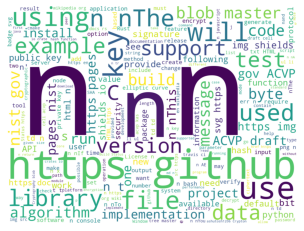

In [19]:
img = WordCloud(background_color='white', width=1600, height=1200).generate(str(data))
plt.imshow(img)
plt.axis("off")
plt.show()

In [20]:
def wordcloud_plots(dictionary):
    for key in dictionary.keys():
        data = dictionary[key].lemm.values
        img = WordCloud(background_color='white', width=1600, height=1200).generate(str(data))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        print(key)
        

In [ ]:
wordcloud_plots(lang_dict)

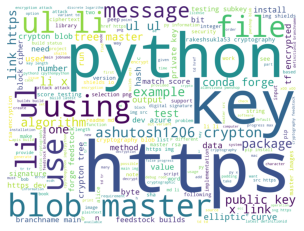

In [21]:
data = lang_dict['Python'].cleaned.values
img = WordCloud(background_color='white', width=1600, height=1200).generate(str(data))
plt.imshow(img)
plt.axis("off")
plt.show()


In [26]:
import images
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

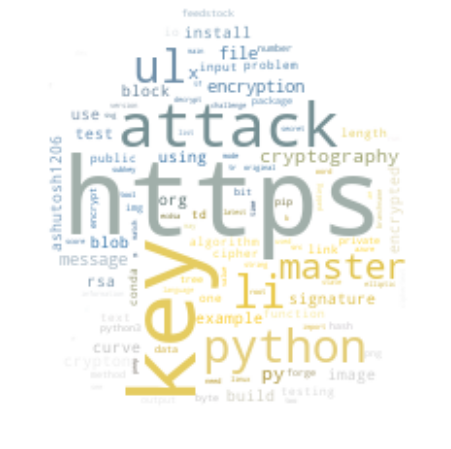

In [34]:
# Generate a word cloud image
mask = np.array(Image.open("images/download.jpeg"))
wordcloud = WordCloud(width = 30, height = 20, background_color='white', colormap='Set2', collocations=False,mask=mask).generate(str(data))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news.png", format="png") 
plt.show()

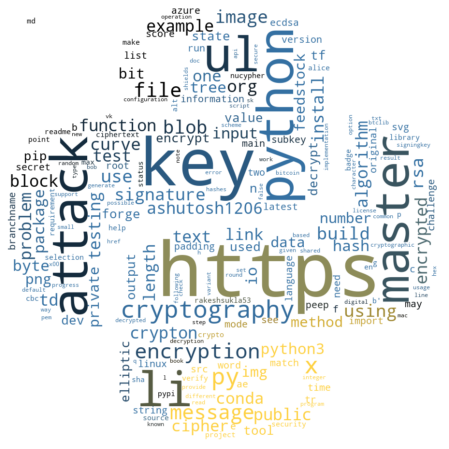

In [67]:
# Generate a word cloud image
python_mask = np.array(Image.open("images/p.jpg"))
wordcloud = WordCloud(width = 30, height = 20, background_color='white', mode = 'RGBA', colormap='Set3', collocations=False,mask=python_mask).generate(str(data))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news.png", format="png") 
plt.show()

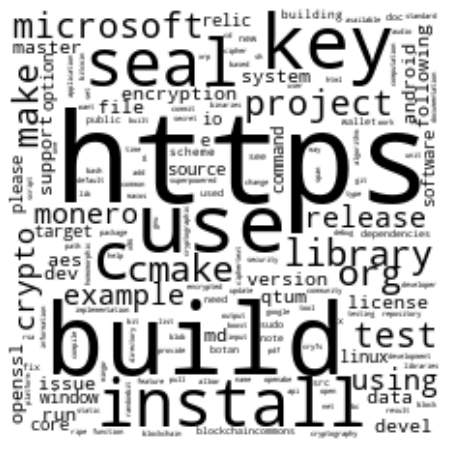

In [66]:
c_plus_data = lang_dict['C++'].cleaned.values
c_plus_mask = np.array(Image.open("images/java.png"))
wordcloud = WordCloud(width = 30, height = 20, background_color='white', mode = 'RGBA', colormap='Set3', collocations=False,mask=c_plus_mask).generate(str(c_plus_data))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news.png", format="png") 
plt.show()

In [ ]:
lang_dict['Python'].cleaned.values

In [ ]:
def words_to_counts(df):
    '''
    This function will break dataframe into words and word frequency.
    Then concate it into a DataFrame for exploration
    '''
    python_words = ' '.join(df[df.lemm == 'Python'])
    java_words = ' '.join(df[df.lemm == 'JavaScript'])
    html_words = ' '.join(df[df.lemm == 'HTML'])
    other_words = ' '.join(df[df.lemm == 'Other'])
    all_words = ' '.join(df)

    py_freq = pd.Series(python_words.split()).value_counts()
    java_freq = pd.Series(java_words.split()).value_counts()
    html_freq = pd.Series(html_words.split()).value_counts()
    other_freq = pd.Series(other_words.split()).value_counts()
    all_freq = pd.Series(all_words.split()).value_counts()

    word_counts = pd.concat([py_freq, java_freq, html_freq, other_freq, all_freq], axis=1).fillna(0).astype(int)
    word_counts.columns = ['python', 'java', 'html', 'other', 'all']
    return word_counts

In [ ]:
words_to_counts(df)

In [ ]:
words_to_counts(df)

In [ ]:
df.head()

In [ ]:
python_words = lang_dict['Python'].cleaned

In [ ]:
python_frequency = pd.Series(python_words).str

In [ ]:
python_words = python_words.str.split()

In [ ]:
python_words.str.split()

In [ ]:
py_freq = python_words.str.split().value_counts()

In [ ]:
df.cleaned.apply(lambda x: len(x.split()))

In [ ]:
from collections import Counter
results = Counter()
df['cleaned'].str.lower().str.split().apply(results.update)
pd.DataFrame(dict(results), index=[key for key in dict(results).keys()])

In [ ]:
from collections import Counter
langs=list(lang_dict.keys())

dicts= {}
for lang in langs:
    results = Counter()
    lang_dict[lang].cleaned.str.lower().str.split().apply(results.update)
    dicts[lang] = pd.DataFrame(dict(results), index= range(len(df))).T[0]
    
word_freq = pd.DataFrame(dicts).fillna(0)    


In [ ]:
dicts2 = dicts['Python'].sort_values(ascending=False).head(20)

In [ ]:
dicts2

In [ ]:
dicts2 = dicts2.reset_index()


In [ ]:
dicts2.rename(columns = {'index':'words', 0:'count'}, inplace = True)
dicts2

In [ ]:
dicts2.dtypes

# Modeling

In [ ]:
dicts[key]

In [ ]:
lang_dict[key]

In [ ]:
df.shape

In [ ]:
import numpy as np

In [ ]:
n_documents = 407

x = np.arange(1, n_documents + 1)
y = np.log(n_documents / x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')



In [ ]:
python_doc = lang_dict['Python'].cleaned
python_doc

In [ ]:
pprint(python_doc)

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(df, target):
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=17, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=17, 
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=17)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=17)
    print(f'train\t n = {train.shape[0]}')
    print(f'validate n = {validate.shape[0]}')
    print(f'test\t n = {test.shape[0]}')
    
    return train, validate, test

In [ ]:
target = 'language'

In [ ]:
train, validate, test = split_data(df)

In [ ]:
train.language.value_counts()

In [ ]:
import sklearn as sk

In [ ]:
def run_baseline(train, 
                 model_number, 
                 model_results):
    y_pred = pd.Series([train[target].mode()[0]]).repeat(len(train))
    dct = {'model_number': 'baseline',
           'model_type': 'baseline',
           'sample_type': 'train',
           'accuracy': sk.metrics.accuracy_score(train[target], y_pred)}
    model_results = model_results.append(dct, ignore_index=True)
    model_number = 0
    
    return model_number, model_results

In [ ]:
y_pred = pd.Series([train[target].mode()[0]]).repeat(len(train))
y_pred.value_counts()

In [ ]:
model_number = 0
model_results = pd.DataFrame()

model_number, model_results = run_baseline(train, 
                                           model_number, 
                                           model_results)

In [ ]:
model_number, model_results

In [ ]:
document = df.cleaned
document

In [ ]:
document = df.cleaned


# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))


In [ ]:
dicts['Python'].sort_values(ascending=False).head(20)

In [ ]:
def getList(dict):
    return dict.keys()

In [ ]:
getList(dicts)